<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/BNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X_train_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32) #input
y_train_data =np.array([[0], [1], [1], [0]], dtype=np.float32) #output

In [10]:
# define number of neurons in each layer
n_input =2 #number of features
n_hidden = 4 #number of hidden layers
n_output = 1 #number of output units

# define placeholders for inputs and outputs
X = tf.placeholder(tf.float32,shape=[None, n_input])
y =tf.placeholder(tf.float32,shape=[None, n_output])

# define weights and biases for each column
w1 = tf.Variable(tf.random_normal([n_input, n_hidden])) # weights from input to hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden])) #biases for hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden, n_output])) # weights from hidden to output layer
b2 =tf.Variable(tf.random_normal([n_output])) #biases for output layer

# define activation fuction for each layer
z1 = tf.add(tf.matmul(X, w1),b1) #linear combination for hidden layer
a1 =tf.nn.sigmoid(z1) #sigmoid activation for hidden layer
z2 =tf.add(tf.matmul(a1, w2), b2) #linear combination for output layer
a2 =tf.nn.sigmoid(z2) #sigmoid activation for output layer
# define cost fuction and optimizer
cost = tf.reduce_mean(tf.square(y-a2)) # mean squared error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost) #gradient descent optimizer

Epoch 0, Cost0.25113645195961
Epoch 100, Cost0.2446276694536209
Epoch 200, Cost0.24119582772254944
Epoch 300, Cost0.2393815517425537
Epoch 400, Cost0.2383774220943451
Epoch 500, Cost0.2377701997756958
Epoch 600, Cost0.23735569417476654
Epoch 700, Cost0.23703449964523315
Epoch 800, Cost0.2367585152387619
Epoch 900, Cost0.23650453984737396
Predictions: [[0.40251845]
 [0.53132147]
 [0.5206593 ]
 [0.57757884]]
Actual value: [[0.]
 [1.]
 [1.]
 [0.]]


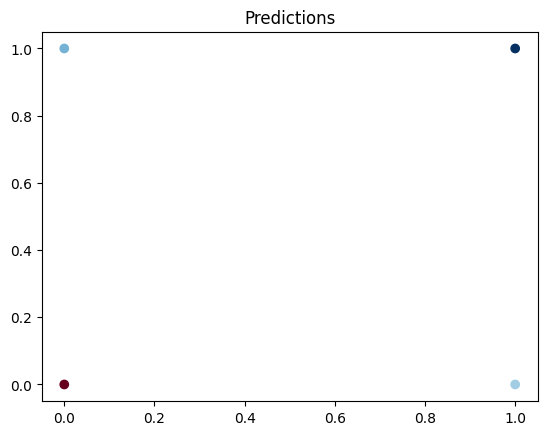

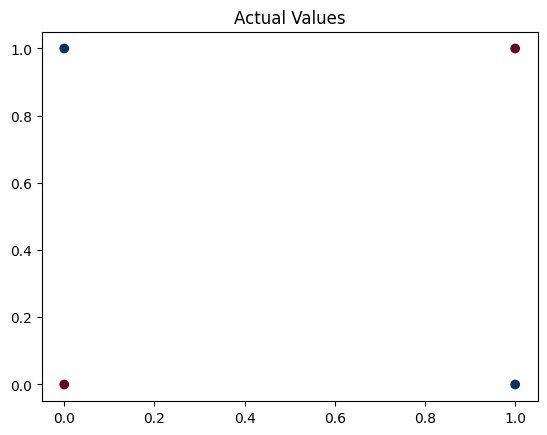

In [11]:
# create a session object
sess = tf.Session()

# initialize all variables
sess.run(tf.global_variables_initializer())

# train for 1000 epochs
for epoch in range(1000):
  # run optimazation and calculate costs
  _, c =sess.run([optimizer, cost], feed_dict={X: X_train_data, y: y_train_data})

  # print costs afetr every 100 epochs
  if epoch % 100 ==0:
    print(f"Epoch {epoch}, Cost{c}")

# our model on unseen data
X_test = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32) #input
y_test =np.array([[0], [1], [1], [0]], dtype=np.float32) #output

# predicting using our trained data
y_pred = sess.run(a2, feed_dict ={X: X_test})

# print predictions
print(f"Predictions: {y_pred}")
print(f"Actual value: {y_test}")

# plot predictions and actual values
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred[:, 0], cmap='RdBu')
plt.title("Predictions")
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:, 0], cmap='RdBu')
plt.title("Actual Values")
plt.show()

# close session
sess.close()
